Script for the processing of the positive data for the binary dataset.
Originally developed by Julián García-Vinueza and Montserrat Goles. Edited and translated by Montserrat Goles.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Note that all datasets have UniProt id.

First, we upload the files.
The file `01_all_dataset_positive´ has all the all the filtered interacting protein pairs from the following databases:
* Hippie
* Mint
* Signor
This file was processed beforehand to remove repeated and null data.

Originally, the facilitated copy of the negatome database had some positive interactions. Here, this interactions are updated in order to check if their interaction data has duplicate, nulls, or if it is contained on the other dataset.

In [2]:
df_pos_negatome = pd.read_csv("negatome_all_positives.csv", sep=',')
df_pos_negatome.columns = ['id_1', 'seq_1', 'id_2', 'seq_2']

if (df_pos_negatome.isnull().values.any()) == True:
    print("There is null data.")

#Adds a column with the label "Negatome"
negatome = 'negatome'
df_pos_negatome['dataset'] = negatome

Let's see if there is data that is repeated in order (change sides of the id).

In [3]:
# Sort id columns in each row
df_pos_negatome[['id_1', 'id_2']] = pd.DataFrame(np.sort(df_pos_negatome[['id_1', 'id_2']], axis=1), columns=['id_1', 'id_2'])

# Drop duplicate rows
df_negatome = df_pos_negatome.drop_duplicates(subset=['id_1','id_2'])

# Check if there are any duplicate interactions left
duplicate_interactions = df_negatome[df_negatome.duplicated(subset=['id_1', 'id_2'])]

if duplicate_interactions.empty:
    print("No duplicate interactions found.")
else:
    print("Duplicate interactions found:")
    print(duplicate_interactions)

df_negatome

No duplicate interactions found.


,id_1,seq_1,id_2,seq_2,dataset
0,P01887,IQKTPQIQVYSRHPPENGKPNILNCYVTQFHPPHIEIQMLKNGKKI...,P11609,SEAQQKNYTFRCLQMSSFANRSWSRTDSVVWLGDLQTHRWSNDSAT...,negatome
2,P01892,MIQRTPKIQVYSRHPAENGKSNFLNCYVSGFHPSDIEVDLLKNGER...,P61769,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,negatome
3,P00127,VTDQLEDLREHFKNTEEGKALVHHYEECAERVKIQQQQPGYADLEH...,P07256,AEVTQLSNGIVVATEHNPSAHTASVGVVFGSGAANENPYNNGVSNL...,negatome
4,P00128,MPQSFTSIARIGDYILKSPVLSKLCVPVANQFINLAGYKKLGLKFD...,P07256,AEVTQLSNGIVVATEHNPSAHTASVGVVFGSGAANENPYNNGVSNL...,negatome
5,P00163,MAFRKSNVYLSLVNSYIIDSPQPSSINYWWNMGSLLGLCLVIQIVT...,P07256,AEVTQLSNGIVVATEHNPSAHTASVGVVFGSGAANENPYNNGVSNL...,negatome
...,...,...,...,...,...
6180,P00742,MRKLCSLDNGDCDQFCHEEQNSVVCSCARGYTLADNGKACIPTGPY...,P01008,LLIGFWDCVTCHGSPVDICTAKPRDIPMNPMCIYRSPEKKATEDEG...,negatome
6186,P38919,PQRSVEGWILFVTGVHEEATEEDIHDKFAEYGEIKNIHLNLDRRTG...,Q9Y5S9,ATTATMATSGSARKRLLKEEDMTKVEFETSEEVDVTPTFDTMGLRE...,negatome
6187,O15234,DTKSTVTGERQSGDGQESTEPVENKVGKKGPKHLDDDEDRKNPAYI...,P38919,ATTATMATSGSARKRLLKEEDMTKVEFETSEEVDVTPTFDTMGLRE...,negatome
6190,P61326,REDYDSVEQDGDEPGPQRSVEGWILFVTGVHEEATEEDIHDKFAEY...,Q9Y5S9,MESDFYLRYYVGHKGKFGHEFLEFEFRPDGKLRYANNSNYKNDVMI...,negatome


Negatome has 969 unique positive interactions. 

Now we uploead the existing positive dataset (Hippie, Mint, and Signor data).

In [5]:
df_three = pd.read_csv("01_all_dataset_positive.csv", sep=',')
df_three.columns = ['id_1', 'seq_1', 'id_2', 'seq_2', 'dataset']

We add Negatome's positive interaction data.

In [6]:
df_pairs = pd.concat([df_three, df_negatome], axis=0)

We check if there is any null data.

In [7]:
if (df_pairs.isnull().values.any()) == True:
    print("There is null data.")

Check if the interaction data is unique. Identifiers are sorted alphabetically in each row to see if there are any repetitions.

In [8]:
# Sort id columns in each row
df_pairs[['id_1', 'id_2']] = pd.DataFrame(np.sort(df_pairs[['id_1', 'id_2']], axis=1), columns=['id_1', 'id_2'])

df_main = df_pairs.drop_duplicates(subset=['id_1','id_2'])
df_main.info()

# Check if there are any duplicate interactions left
duplicate_interactions = df_main[df_main.duplicated(subset=['id_1', 'id_2'])]

if duplicate_interactions.empty:
    print("No duplicate interactions found.")
else:
    print("Duplicate interactions found:")
    print(duplicate_interactions)

#Se agrega que son positivos
df_main['Interaccion'] = 1

<class 'pandas.core.frame.DataFrame'>
Index: 847330 entries, 0 to 847329
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id_1     847330 non-null  object
 1   seq_1    847330 non-null  object
 2   id_2     847330 non-null  object
 3   seq_2    847330 non-null  object
 4   dataset  847330 non-null  object
dtypes: object(5)
memory usage: 38.8+ MB
No duplicate interactions found.


C:\Users\monts\AppData\Local\Temp\ipykernel_8408\1062604282.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['Interaccion'] = 1


All the values that were duplicated corresponded to Negatome. So now we quantify and characterize the database.
First, count the data.
 

We have 847.330 unique interactions. Now let's check the unique protein sequences. 
To do this, we occupy the rows with their IDs and concatenate them, then eliminate the duplicates.

In [9]:
df_1 = df_main.filter(['id_1','seq_1'], axis=1)
df_1.columns = ['id_seq','seq']

df_2 = df_main.filter(['id_2','seq_2'], axis=1)
df_2.columns = ['id_seq','seq']

#concatenar
df_all_seq = pd.concat([df_1, df_2])

df_unique_id = df_all_seq.drop_duplicates(subset=['id_seq'],ignore_index=True)
#42493 seq unicos
#43568 ids unicos
df_unique_id.info()

df_unique_seq = df_all_seq.drop_duplicates(subset=['seq'],ignore_index=True)
df_unique_seq.info()

df_unique_id.to_csv('unique_ids_positives.csv', index_label=False, index=False, encoding='utf-8')
df_unique_seq.to_csv('unique_seq_positives.csv', index_label=False, index=False, encoding='utf-8')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43568 entries, 0 to 43567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id_seq  43568 non-null  object
 1   seq     43568 non-null  object
dtypes: object(2)
memory usage: 680.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42493 entries, 0 to 42492
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id_seq  42493 non-null  object
 1   seq     42493 non-null  object
dtypes: object(2)
memory usage: 664.1+ KB


In [10]:
#seq
id = pd.read_csv("unique_ids_positives.csv", sep=',')
lista_valores = id['id_seq']

df_filtrado = df_main[df_main['id_1'].isin(lista_valores)]
df_filtrado_2 = df_filtrado[df_filtrado['id_2'].isin(lista_valores)]
print(df_filtrado_2)

seq = pd.read_csv("unique_seq_positives.csv", sep=',')
lista_valores_x = seq['seq']
print(len(seq['seq']))

df_filtrado_x = df_filtrado_2[df_filtrado_2['seq_1'].isin(lista_valores_x)]
df_filtrado_y = df_filtrado_x[df_filtrado_x['seq_2'].isin(lista_valores_x)]
print(df_filtrado_y)


df_filtrado_y.to_csv('Positives_Refined.csv', index_label=False, index=False, encoding='utf-8')


              id_1                                              seq_1    id_2  \
0       A0A023PXA5  MLLSELVATASSLPYTAISIHNNCRVPAARHIHHGCRYFHGPPVMH...  P33302   
1       A0A023PXA5  MLLSELVATASSLPYTAISIHNNCRVPAARHIHHGCRYFHGPPVMH...  P47068   
2       A0A023PXP4  MLIGAPSNMRLRGALELLWRRLLHGLMQLRLVLKMHICSQLNHAIK...  P39743   
3       A0A023PYF7  MTVLLEHPLGPDSSRILCLALGKNMASKASCTSLSFLLCMATCSKQ...  P39743   
4       A0A023PZD0  MTIVHFVGSLFFFFFFSYIFFYNDHGLYTWGCNFAMESPSPTSSPS...  P53281   
...            ...                                                ...     ...   
847325      U5TLZ3  MKRACSRSPSPRRRPSSPRRTPPRDGTPPQKADADDPTPGASNDAS...  U5TMQ7   
847326      U5TLZ3  MKRACSRSPSPRRRPSSPRRTPPRDGTPPQKADADDPTPGASNDAS...  U5TQC3   
847327      U5TMQ7  MAGREGRTRQRTLRDTIPDCALRSQTLESLDARYVSRDGAHNAAVW...  U5TMQ7   
847328      U5TMQ7  MDRDAAHAALRRRLAETHLRAEIYKDQTLQLHREGVSTQDPRFVGA...  U5TQC3   
847329      U5TQC3  MDRDAAHAALRRRLAETHLRAEIYKDQTLQLHREGVSTQDPRFVGA...  U5TQC3   

                           

In [11]:
duplicate = df_filtrado_y[df_filtrado_y.duplicated(subset=['id_1', 'id_2'])]

if duplicate_interactions.empty:
    print("No duplicate interactions found.")
else:
    print("Duplicate interactions found:")
    print(duplicate_interactions) 

No duplicate interactions found.


In [12]:
df_unique_seq.head()

,id_seq,seq
0,A0A023PXA5,MLLSELVATASSLPYTAISIHNNCRVPAARHIHHGCRYFHGPPVMH...
1,A0A023PXP4,MLIGAPSNMRLRGALELLWRRLLHGLMQLRLVLKMHICSQLNHAIK...
2,A0A023PYF7,MTVLLEHPLGPDSSRILCLALGKNMASKASCTSLSFLLCMATCSKQ...
3,A0A023PZD0,MTIVHFVGSLFFFFFFSYIFFYNDHGLYTWGCNFAMESPSPTSSPS...
4,A0A023PZD0,MSSTAVPRPKPWETSASLEEPQRNAQSLSAMMTSNQQDSRPTEESN...


In the dataset there are *43.568* unique protein sequences. 

Now we characterize the proteins in the database. To do this we need to know the number of amino acids in their sequences. 

In [13]:
# create an empty array
largos_seq_1 = []
largos_seq_2 = []

for i in range(0,len(df_main)):
    s1 = df_main['seq_1'][i]
    largos_seq_1.append(len(s1))
    
    s2 = df_main['seq_2'][i]
    largos_seq_2.append(len(s2))

df_len_id_1 = pd.DataFrame(largos_seq_1)
df_len_id_2 = pd.DataFrame(largos_seq_2)

In [40]:
df_junto = pd.concat([df_len_id_1,df_len_id_2], axis=1)
df_junto.columns = ['seq_1','seq_2']
df_junto

,seq_1,seq_2
0,189,1511
1,189,1157
2,132,482
3,126,482
4,216,241
...,...,...
847325,334,130
847326,334,219
847327,130,130
847328,219,130


In [41]:
df_junto.describe()

,seq_1,seq_2
count,847330.000000,847330.000000
mean,582.985125,681.898483
std,553.437681,797.928795
min,7.000000,9.000000
25%,277.000000,305.000000
50%,444.000000,501.000000
75%,726.000000,808.000000
max,35213.000000,35213.000000


Analizemos las secuencias únicas. 

In [42]:
# definir un array vacío
largos_seq_uniq = []

for i in range(0,len(df_unique_seq)):
    s = df_unique_seq['seq'][i]
    largos_seq_uniq.append(len(s))

df_len_uniq_n = pd.DataFrame(largos_seq_uniq) # sin id

df_uniq_id = df_unique_seq.filter(items=['id_seq'])

df_len_uniq = pd.concat([df_uniq_id,df_len_uniq_n],axis=1)
df_len_uniq.columns =['id', 'length']

df_len_uniq.head()

,id,length
0,A0A023PXA5,189
1,A0A023PXP4,132
2,A0A023PYF7,126
3,A0A023PZD0,216
4,A0A023PZD0,386


In [43]:
df_len_uniq_n.to_csv('unique_seq_positives.csv', index_label=False, index=False, encoding='utf-8')

In [44]:
df_len_uniq.describe()

,length
count,42493.000000
mean,596.383028
std,606.285521
min,7.000000
25%,276.000000
50%,448.000000
75%,724.000000
max,35213.000000


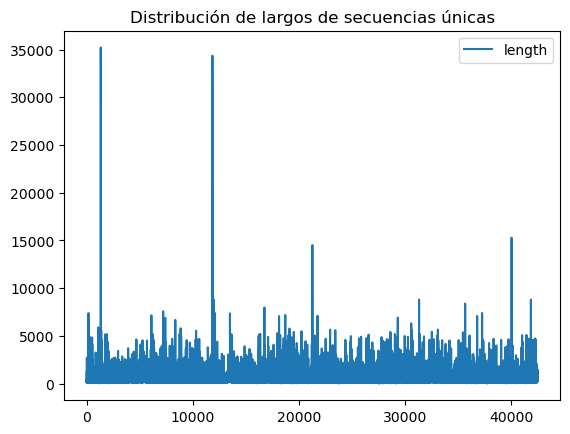

In [45]:
plot_unique = df_len_uniq.plot(kind='line', title="Distribución de largos de secuencias únicas")

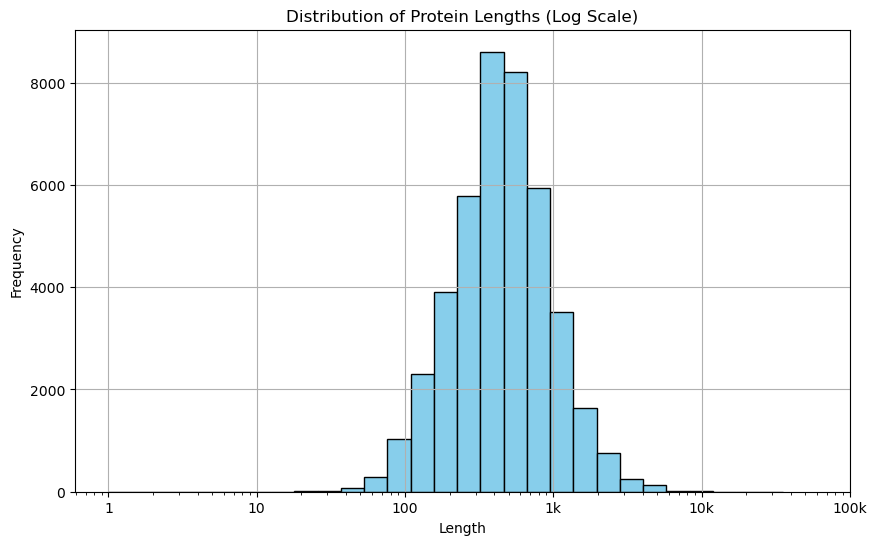

In [46]:
# Define bins for logarithmic scale
log_bins = np.logspace(0, np.log10(df_len_uniq['length'].max()), 30)

# Plot the distribution of protein lengths on a logarithmic scale
plt.figure(figsize=(10, 6))
plt.hist(df_len_uniq['length'], bins=log_bins, color='skyblue', edgecolor='black')
plt.xscale('log')
plt.title('Distribution of Protein Lengths (Log Scale)')
plt.xlabel('Length')
plt.ylabel('Frequency')

# Define custom x-axis ticks
xticks = [1, 10, 100, 1000, 10000, 100000]
xtick_labels = ['1', '10', '100', '1k', '10k', '100k']
plt.xticks(xticks, xtick_labels)

plt.grid(True)
plt.savefig('Gauss.png')
plt.show()

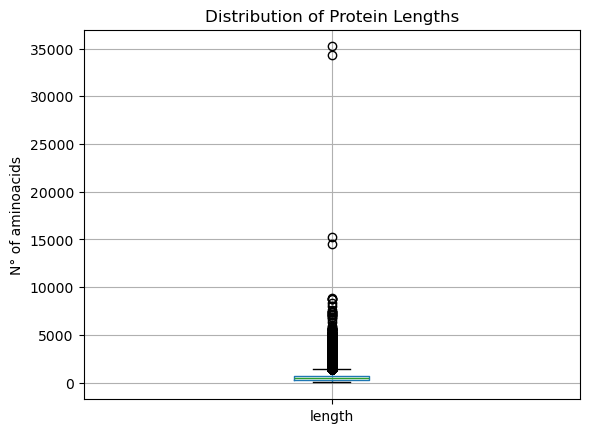

In [47]:
boxplot = df_len_uniq.boxplot(column=['length'])
plt.title('Distribution of Protein Lengths')
plt.ylabel('N° of aminoacids')
plt.savefig('Boxplot.png')